## 1. Importing the libraries and the data

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()  

In [84]:
!pip install seaborn

In [87]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [88]:
df.shape

(200, 5)

In [89]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Checking the data for inconsistencies and further cleaning the data if needed.

In [92]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [93]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [94]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3. Understanding and Visualizing Data

In [95]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


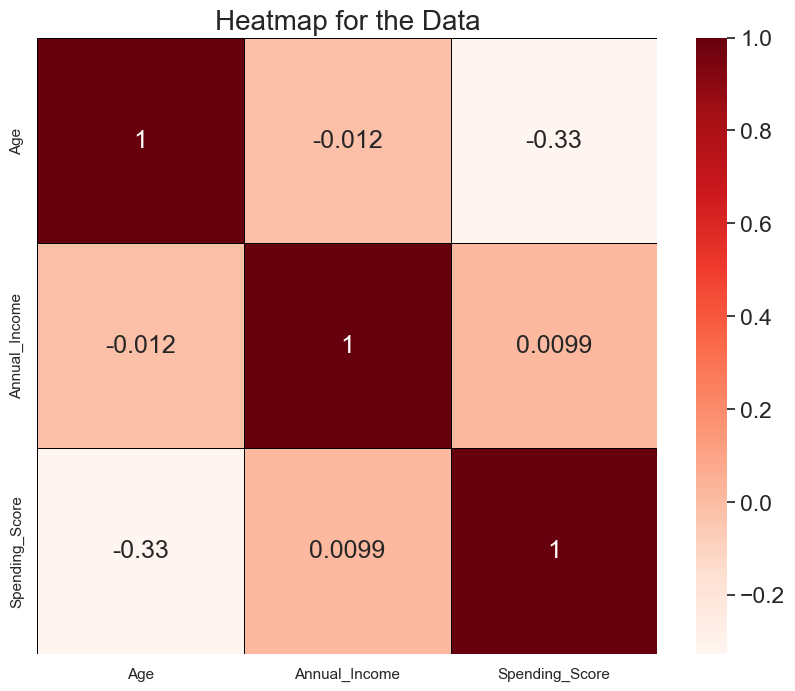

In [96]:
# Plotting the heatmap of correlation of all the columns of the dataset
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### 3.1. Gender Data Visualization

In [109]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [98]:
df['Gender'].dtype

dtype('O')

In [99]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [100]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\1150764275.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=df['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\1150764275.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=df['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\1150764275.py:10: FutureWarning: Series.__getitem__ treating keys as posit

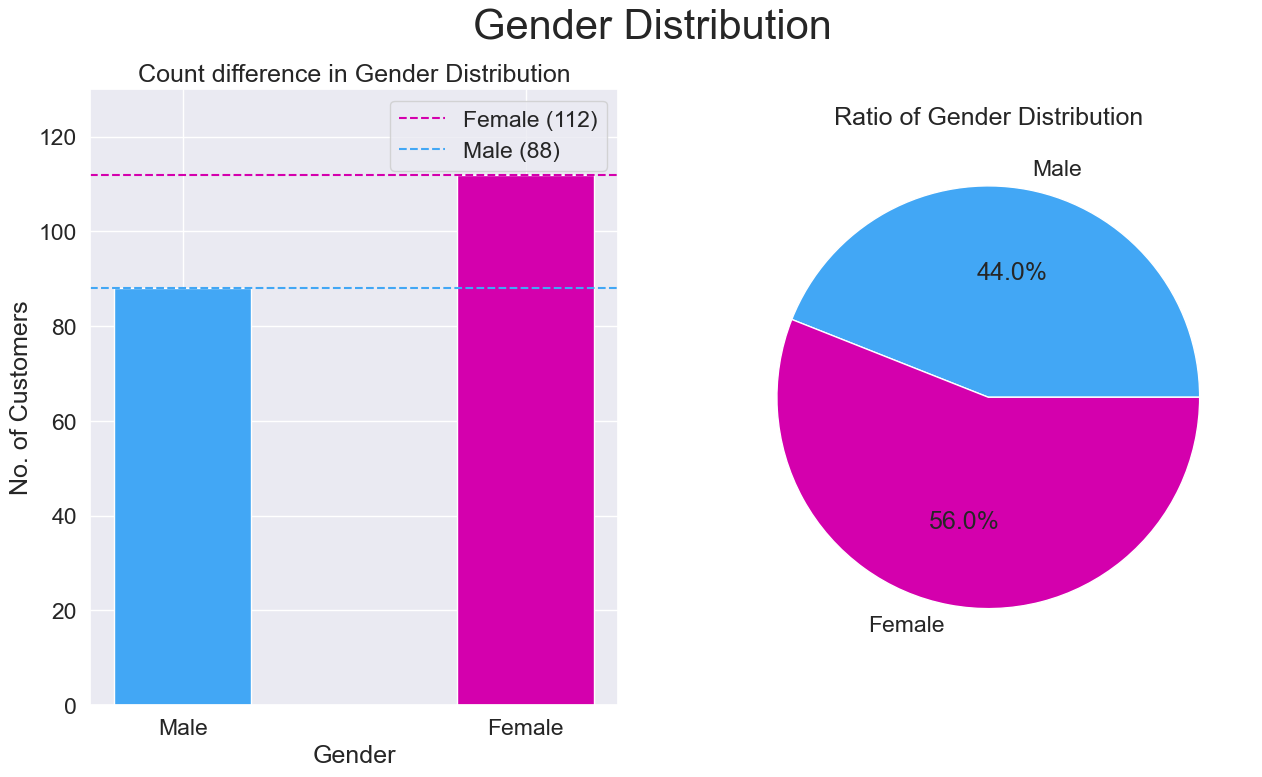

In [45]:
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=df['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
ax0.axhline(y=df['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({df.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

### 3.2 AGE DATA VISUALIZATION

In [110]:
df['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [111]:
df['Age'].dtype

dtype('int64')

In [112]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [113]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2348504729.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df.Age.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2348504729.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df.Age.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2348504729.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In 

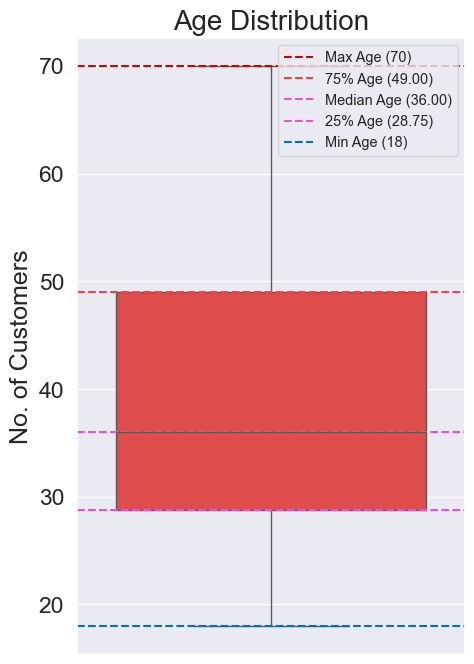

In [114]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Age"], color="#f73434")
ax.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df.Age.max()})')
ax.axhline(y=df['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df.Age.describe()[6]:.2f})')
ax.axhline(y=df['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({df.Age.median():.2f})')
ax.axhline(y=df['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({df.Age.describe()[4]:.2f})')
ax.axhline(y=df['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({df.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()


In [115]:
df['Age'].value_counts().head()

Age
32    11
35     9
31     8
19     8
30     7
Name: count, dtype: int64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\3266132952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Age'], palette='spring')


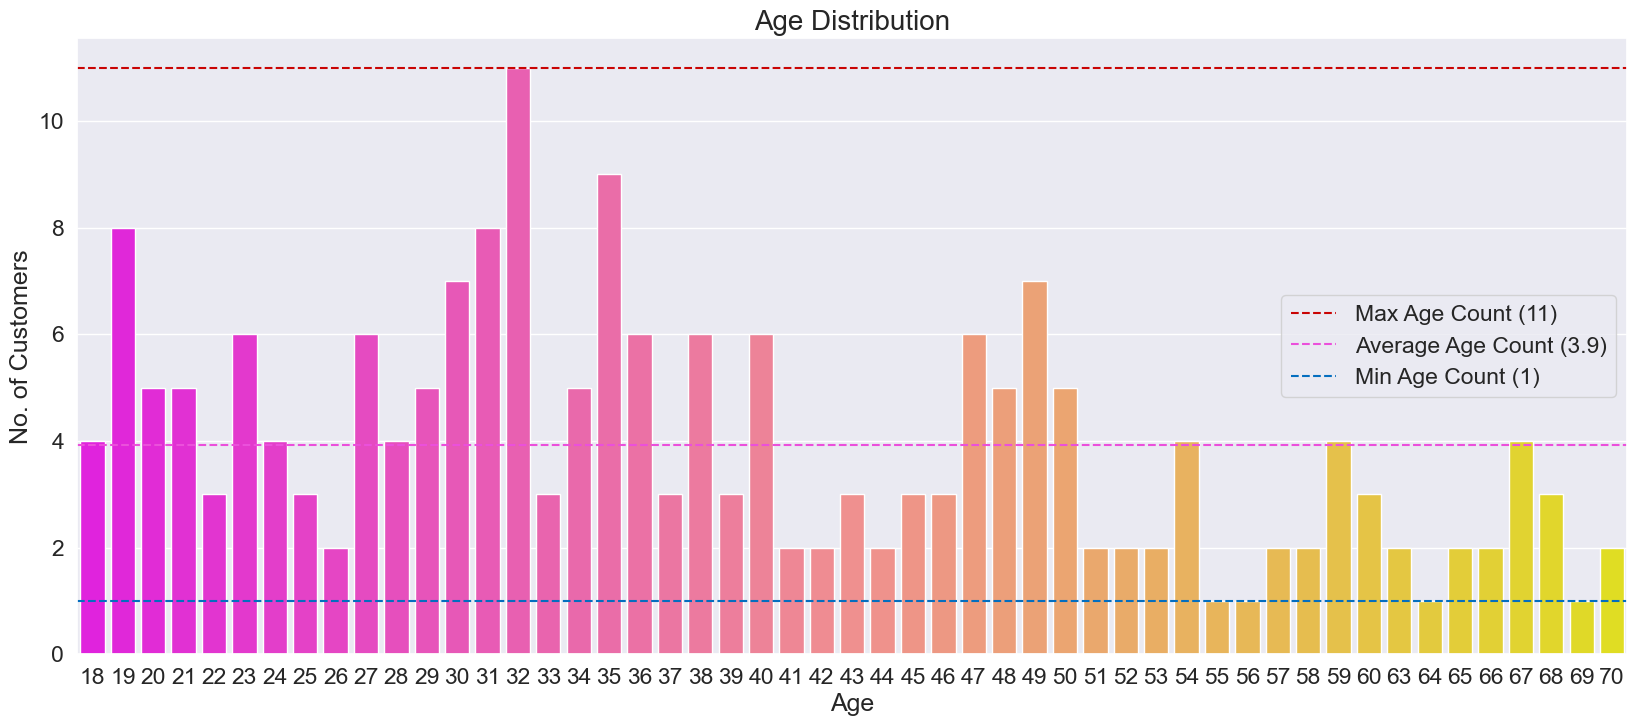

In [103]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df['Age'], palette='spring')
ax.axhline(y=df['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({df.Age.value_counts().max()})')
ax.axhline(y=df['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({df.Age.value_counts().mean():.1f})')
ax.axhline(y=df['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({df.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

#### Gender wise Age Distribution

In [116]:
df[df['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [117]:
df[df['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2408435796.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df_male[7]})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2408435796.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=df_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({df_male[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2408435796.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

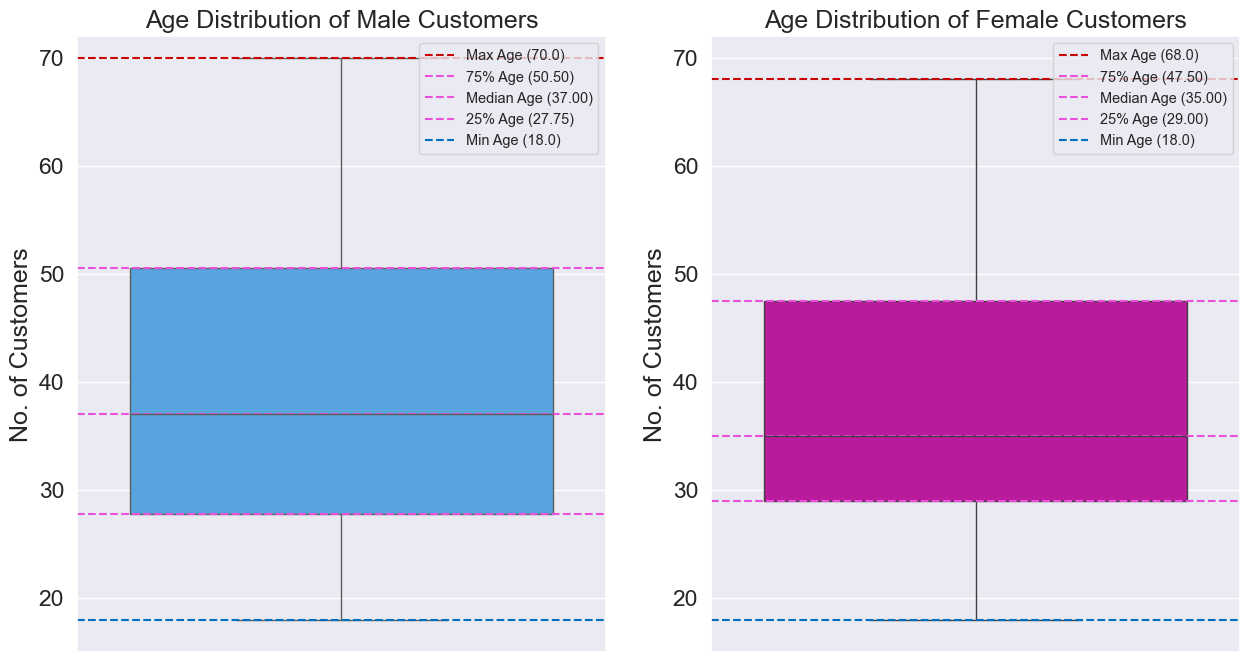

In [118]:
df_male = df[df['Gender']=='Male']['Age'].describe()
df_female = df[df['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df_male[7]})')
ax0.axhline(y=df_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({df_male[6]:.2f})')
ax0.axhline(y=df_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({df_male[5]:.2f})')
ax0.axhline(y=df_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({df_male[4]:.2f})')
ax0.axhline(y=df_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({df_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=df[df['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=df_female[7], linestyle='--',color='#c90404', label=f'Max Age ({df_female[7]})')
ax1.axhline(y=df_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({df_female[6]:.2f})')
ax1.axhline(y=df_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({df_female[5]:.2f})')
ax1.axhline(y=df_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({df_female[4]:.2f})')
ax1.axhline(y=df_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({df_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

In [119]:
# Average Age of Male Customers
df[df['Gender']=='Male'].Age.mean()

np.float64(39.80681818181818)

In [120]:
# Counts of first five max age counts in the Male Customers
df[df['Gender']=='Male'].Age.value_counts().head()

Age
19    6
48    5
32    5
59    4
18    3
Name: count, dtype: int64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2942347613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[df['Gender']=='Male'].Age, palette='spring')


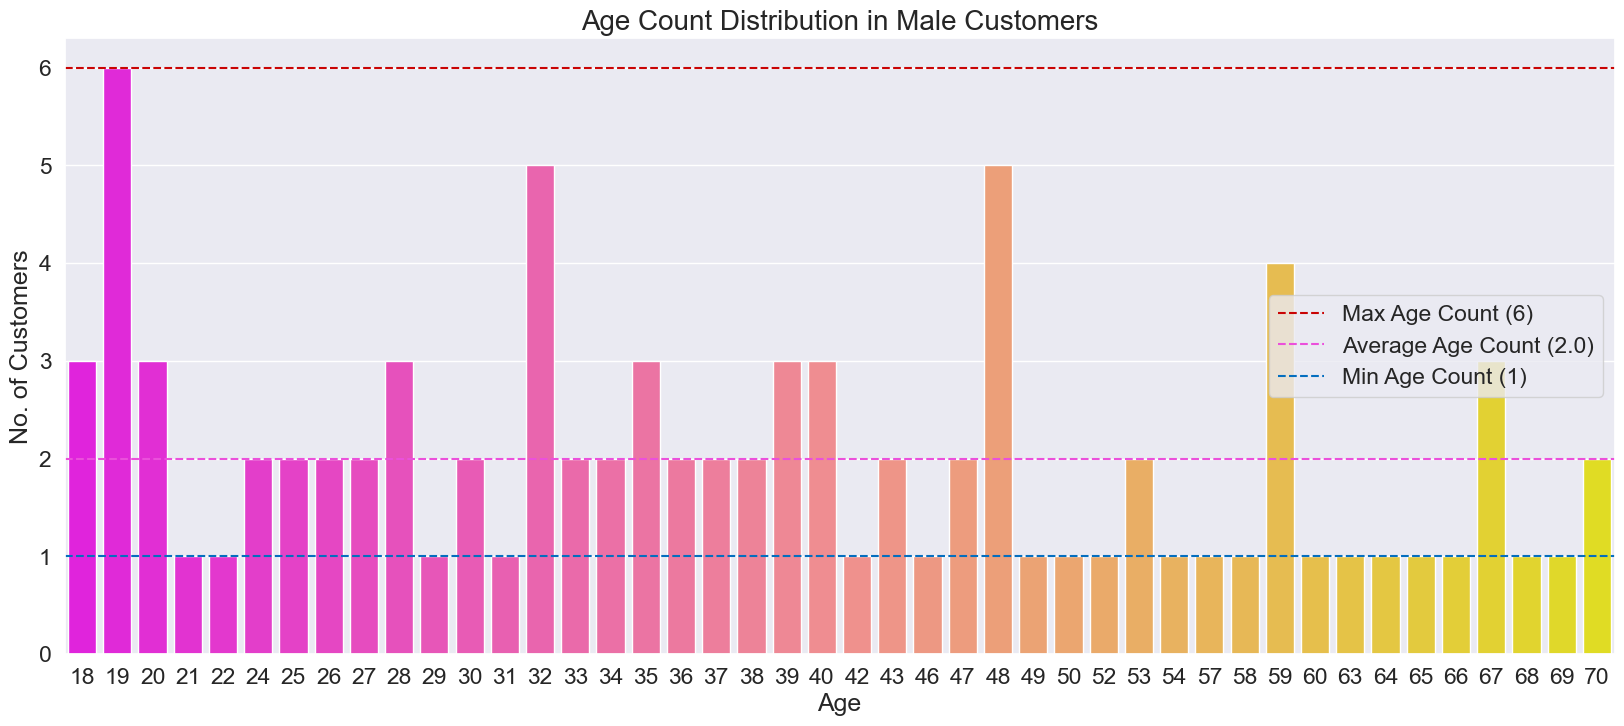

In [63]:
# Visualizing distribution of age count in Male customers using a countplot
maxi = df[df['Gender']=='Male'].Age.value_counts().max()
mean = df[df['Gender']=='Male'].Age.value_counts().mean()
mini = df[df['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df[df['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

In [64]:
# Average Age of Female Customers
df[df['Gender']=='Female'].Age.mean()

np.float64(38.098214285714285)

In [121]:
# Counts of first five max age count in the Female Customers
df[df['Gender']=='Female'].Age.value_counts().head()

Age
31    7
23    6
35    6
32    6
49    6
Name: count, dtype: int64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2682987597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[df['Gender']=='Female'].Age, palette='spring')


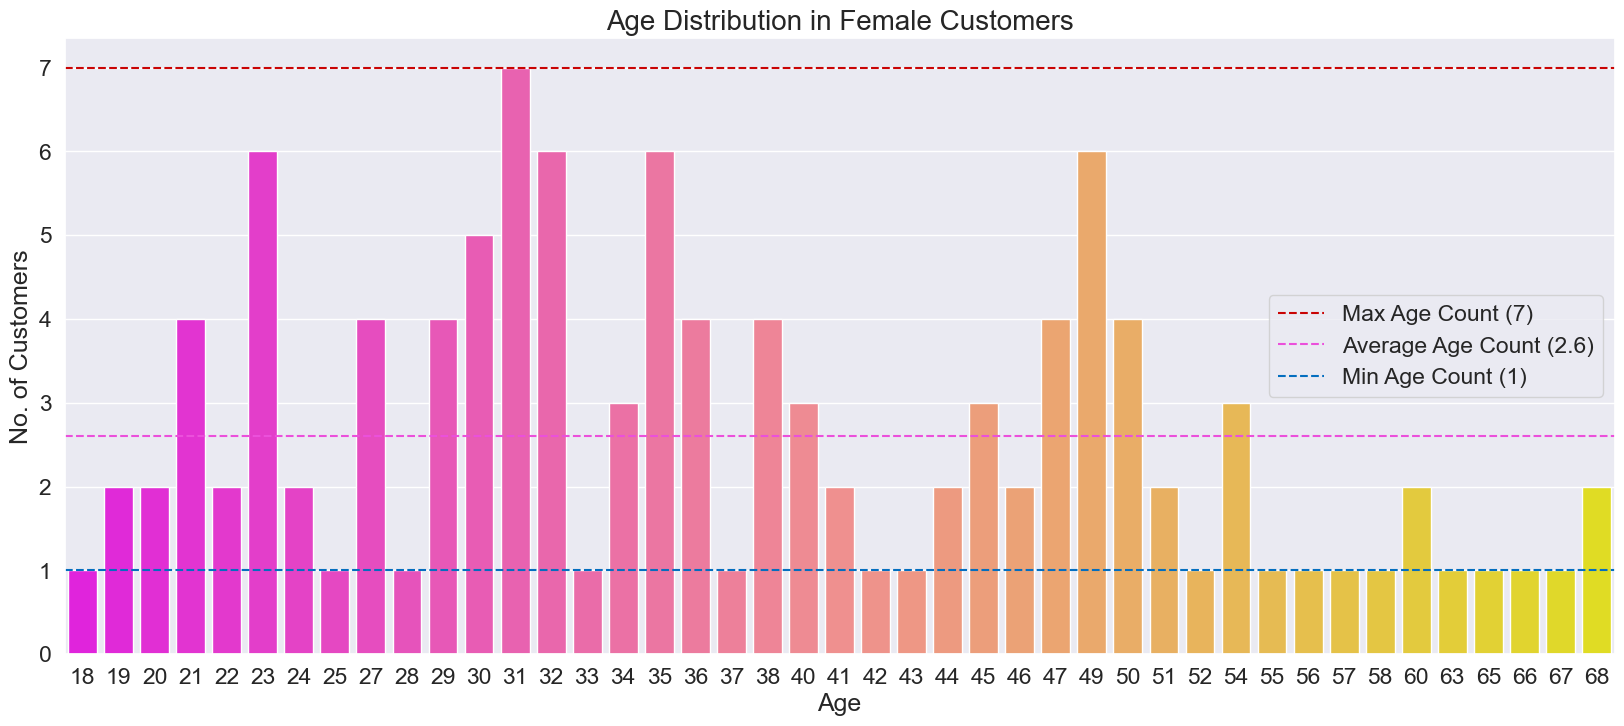

In [122]:
# Visualizing distribution of age count in Female customers using a countplot
maxi = df[df['Gender']=='Female'].Age.value_counts().max()
mean = df[df['Gender']=='Female'].Age.value_counts().mean()
mini = df[df['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df[df['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

# 4. Analyzing Data for Modelling

## 4.1 Analyzing Annual Income Data

In [123]:
df['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [124]:
df['Annual_Income'].dtype

dtype('int64')

In [125]:
df['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2400058833.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({df.Annual_Income.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2400058833.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({df.Annual_Income.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2400058833.py:8: FutureWarning: Series.__getitem__

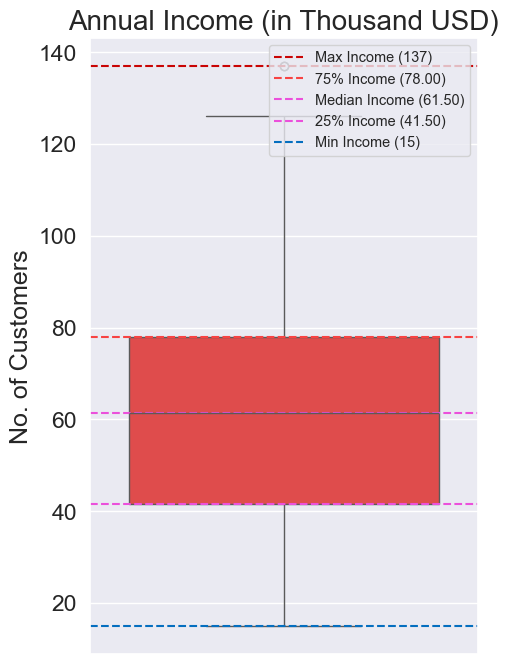

In [126]:
# Visualizing statistical data about Annual Income column on a boxplot
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Annual_Income"], color="#f73434")
ax.axhline(y=df["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({df.Annual_Income.max()})')
ax.axhline(y=df["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({df.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=df["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({df.Annual_Income.median():.2f})')
ax.axhline(y=df["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({df.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=df["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({df.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

In [127]:
df['Annual_Income'].value_counts().head()

Annual_Income
54    12
78    12
60     6
48     6
63     6
Name: count, dtype: int64

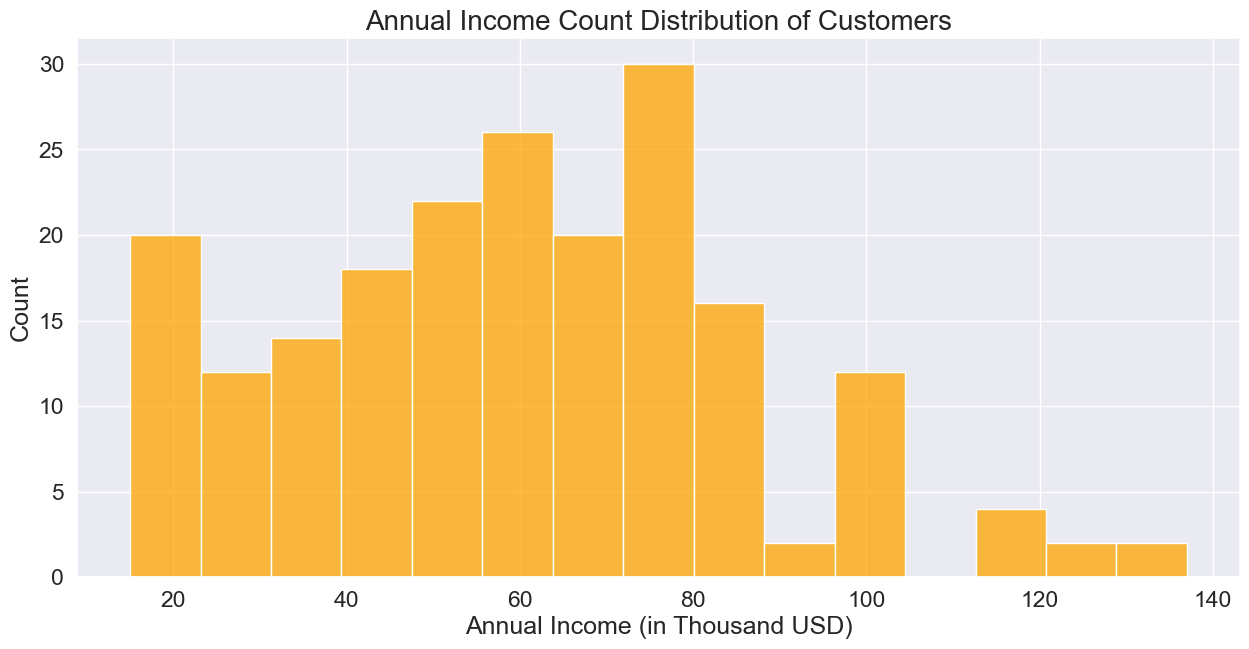

In [128]:
# Visualizing Annual Income count value distribution on a histogram
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(df['Annual_Income'], bins=15, ax=ax, color='orange')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income Count Distribution of Customers', fontsize=20)
plt.show()

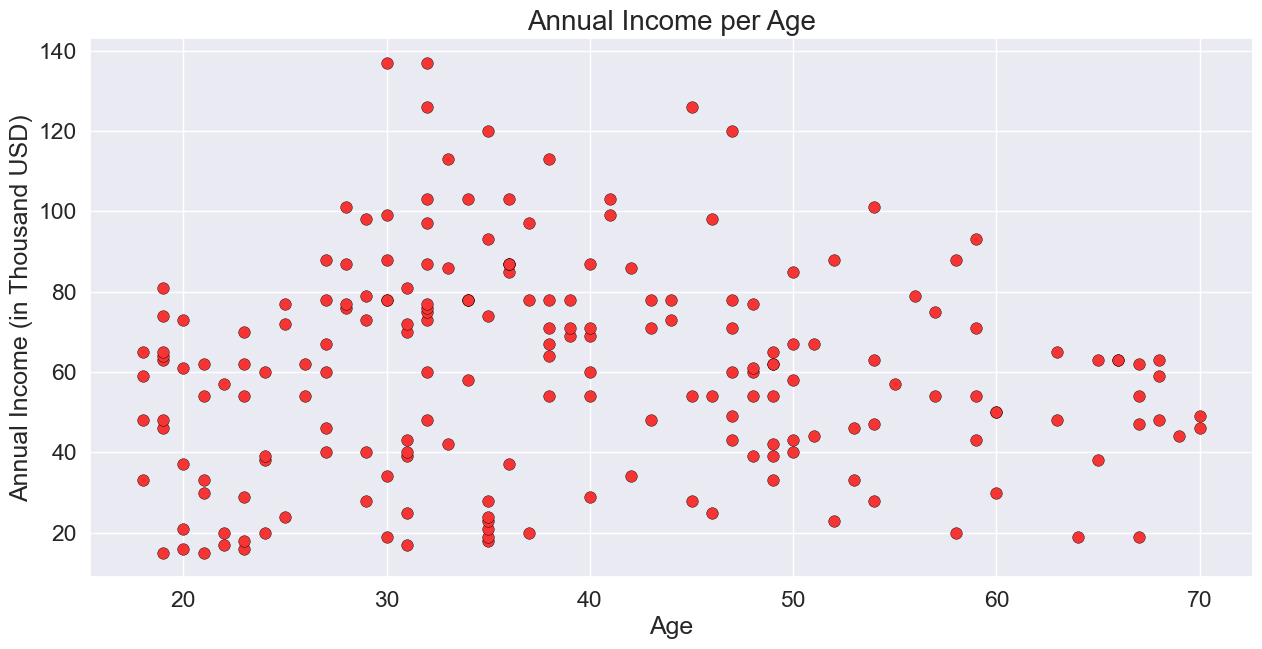

In [129]:
# Visualizing Annual Income per Age on a Scatterplot
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Annual_Income'], x=df['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

In [130]:
# Annual Income per Gender
df[df['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [131]:
df[df['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

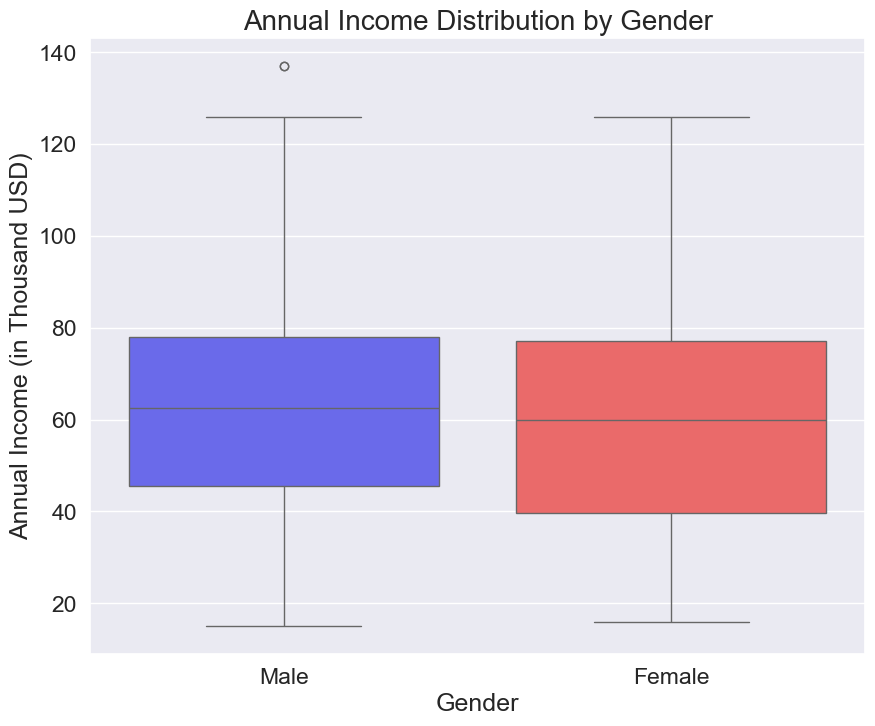

In [132]:
# Visualizing statistical difference of Annual Income between Male and Female Customers
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Gender'], y=df["Annual_Income"], hue=df['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

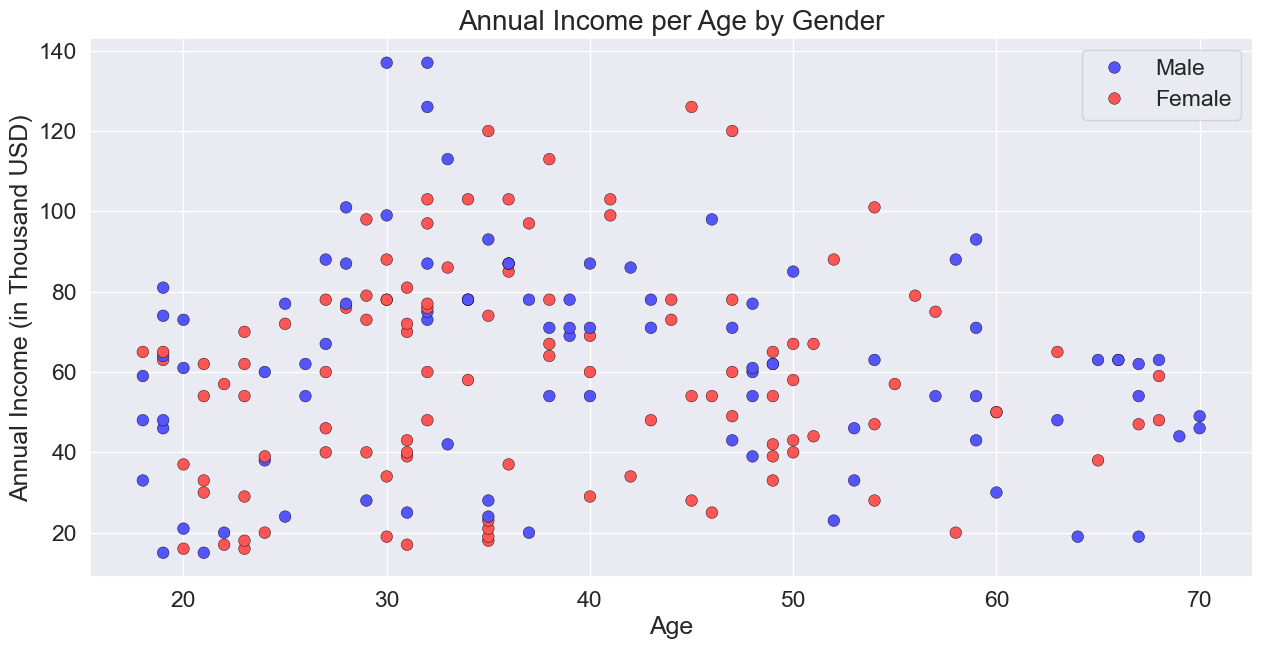

In [133]:
# Visualizing annual Income per Age by Gender on a scatterplot
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Annual_Income'], x=df['Age'], hue=df['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\1962107008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(y=df['Annual_Income'],x=df['Gender'], palette={'Male': '#42a7f5', 'Female': '#d400ad'})


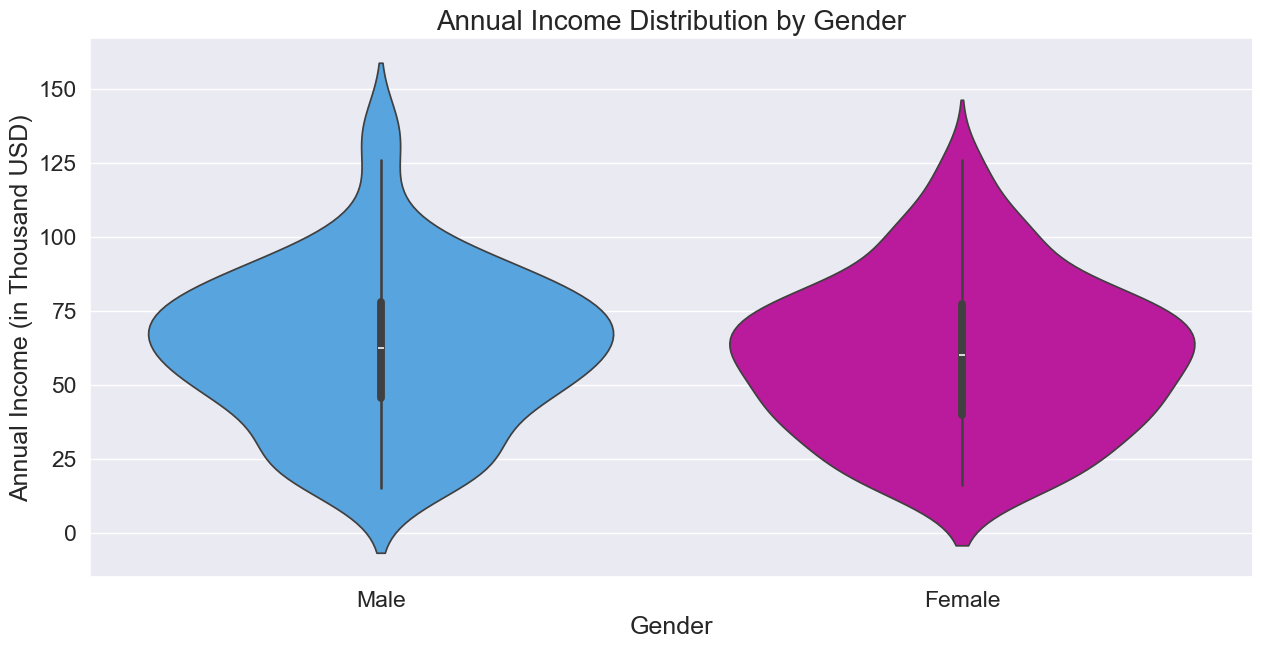

In [135]:
# Visualizing difference of Annual Income between Male and Female Customers using Violin Plot
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Annual_Income'],x=df['Gender'], palette={'Male': '#42a7f5', 'Female': '#d400ad'})
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

## 4.2 Analyzing Spending Score data

In [137]:
df['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

In [139]:
df['Spending_Score'].dtype

dtype('int64')

In [140]:
df['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2083856526.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({df.Spending_Score.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2083856526.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=df['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({df.Spending_Score.describe()[6]:.2f})')
C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2083856526.py:7: FutureWarning: Series.__g

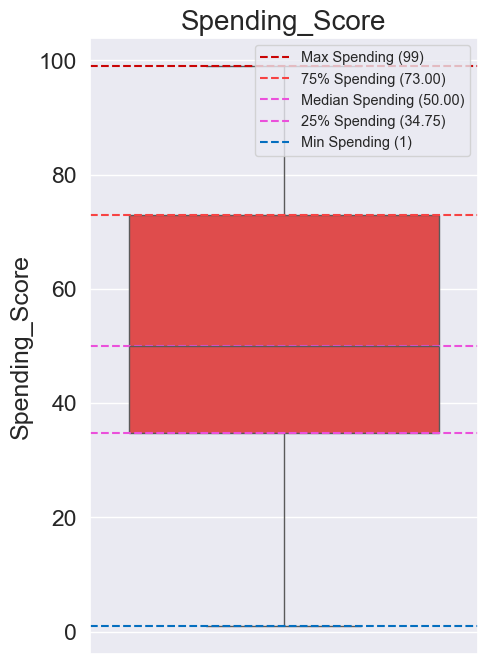

In [141]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Spending_Score"], color="#f73434")
ax.axhline(y=df['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({df.Spending_Score.max()})')
ax.axhline(y=df['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({df.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=df['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({df.Spending_Score.median():.2f})')
ax.axhline(y=df['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({df.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=df['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({df.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending_Score')

plt.title('Spending_Score', fontsize = 20)
plt.show()

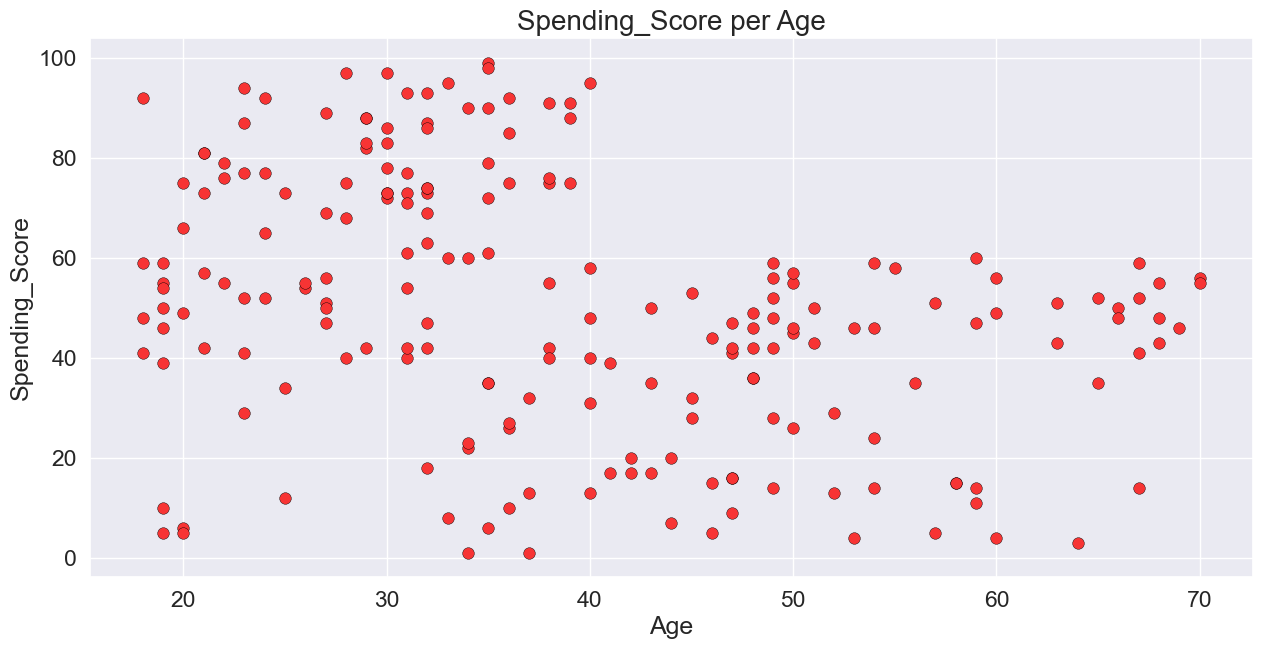

In [142]:
# Visualizing Spending_Score per Age on a Scatterplot
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Spending_Score'], x=df['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending_Score')

plt.title('Spending_Score per Age', fontsize = 20)
plt.show()

In [146]:
df[df['Gender']=='Male'].Spending_Score.describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: Spending_Score, dtype: float64

In [147]:
df[df['Gender']=='Female'].Spending_Score.describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

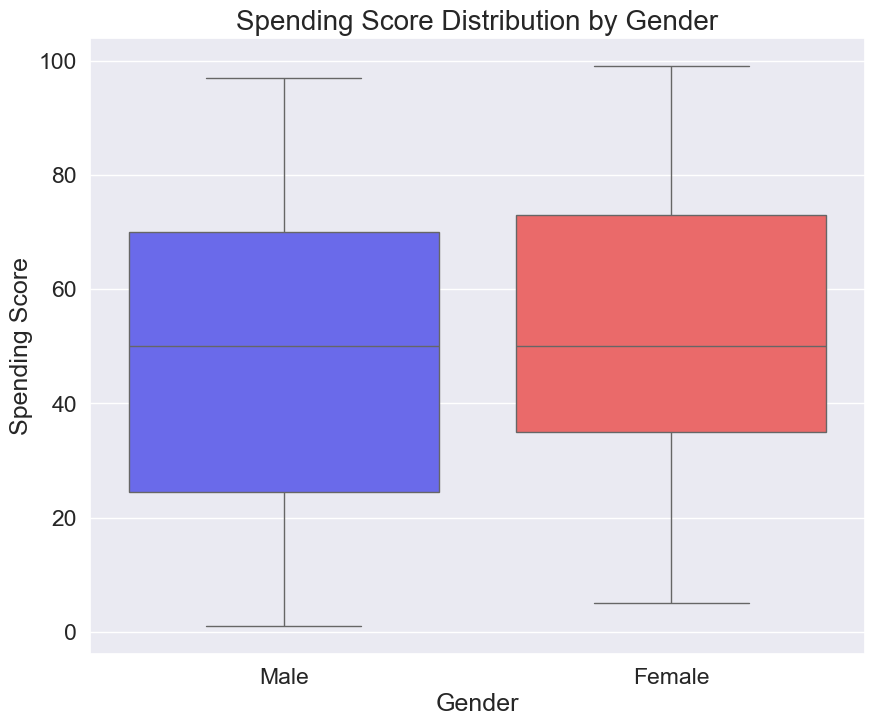

In [148]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Gender'], y=df["Spending_Score"], hue=df['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

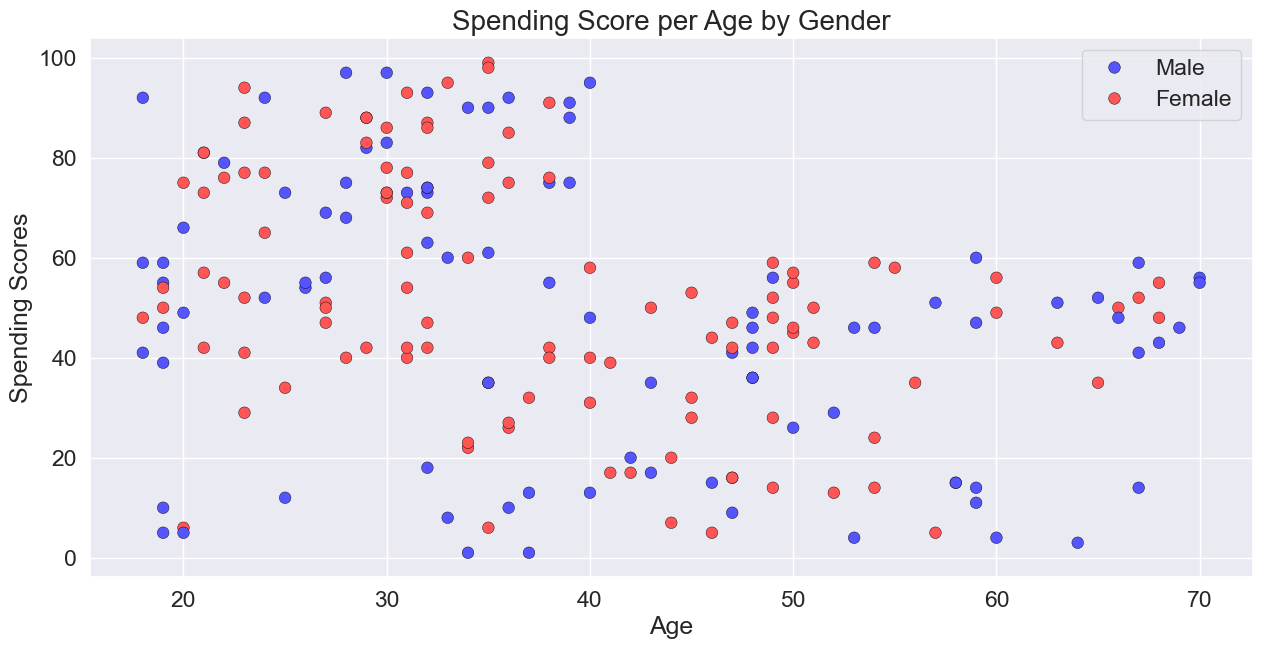

In [149]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Spending_Score'], x=df['Age'], hue=df['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_25620\2753366066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(y=df['Spending_Score'],x=df['Gender'], palette={'Male': '#42a7f5', 'Female': '#d400ad'})


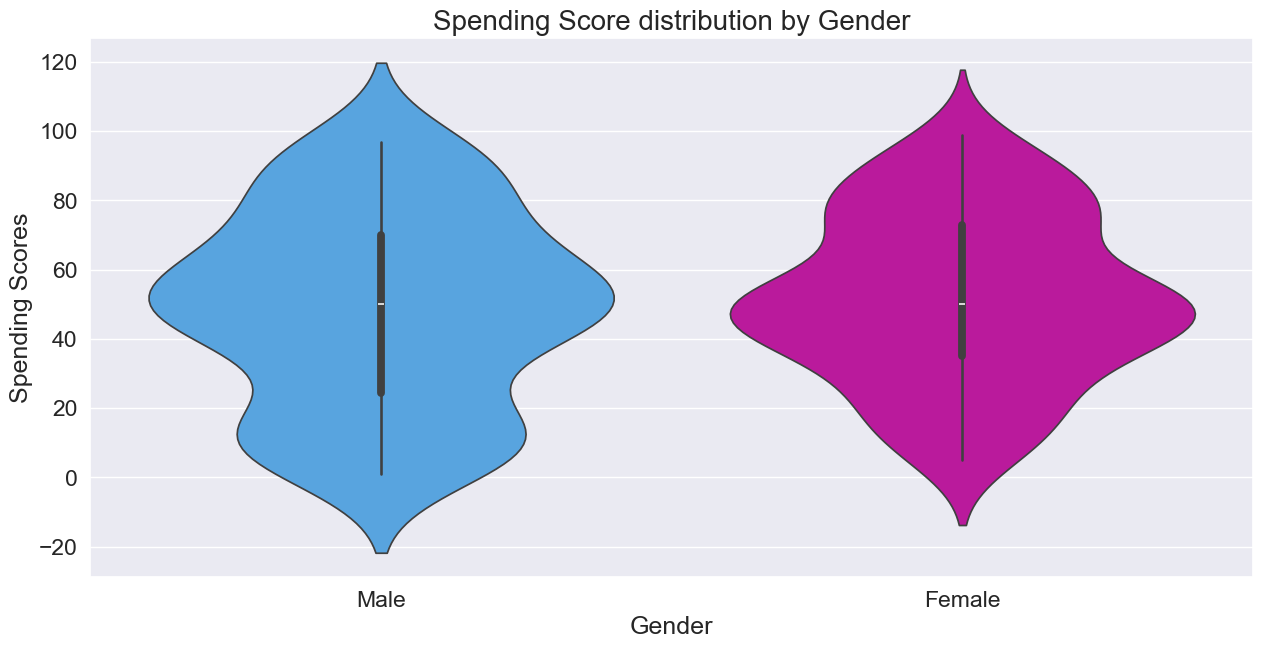

In [154]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Spending_Score'],x=df['Gender'], palette={'Male': '#42a7f5', 'Female': '#d400ad'})
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

# K-Means Clustring

In [156]:
df.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [157]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [158]:
clustering_data = df.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


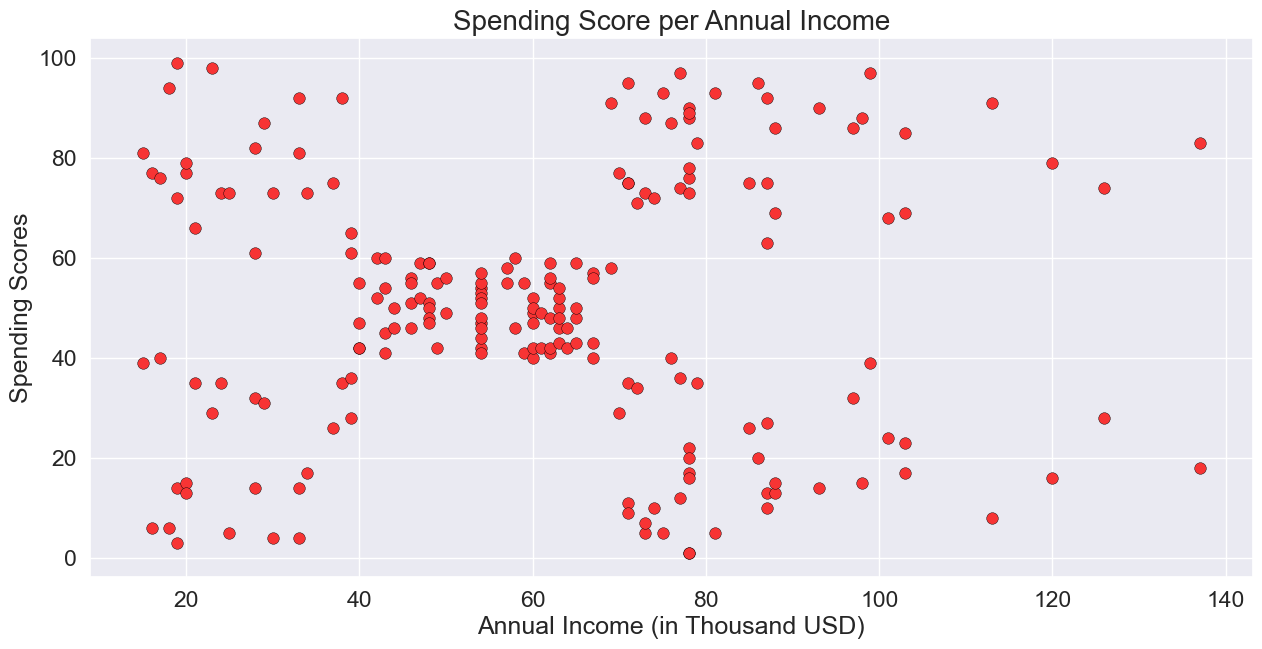

In [159]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

# 5. Determining no. of Cluster Required

In [160]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73880.64496247,
        44448.45544793,  37455.98455516,  32278.29345309,  32332.94212838,
        21818.11458845,  22704.48182651,  18878.98218706,  16342.91049902,
        15818.6580627 ,  13572.31742183,  13208.51190476,  11369.90412928,
        11217.32028266,   9713.79499811,   9388.75928257,   8760.39554196,
         8794.89978896,   7981.10111147,   7310.1491342 ,   6698.65860237,
         6480.60833333,   6172.44642857,   5612.55952381,   5337.83683228,
         5299.16984127])

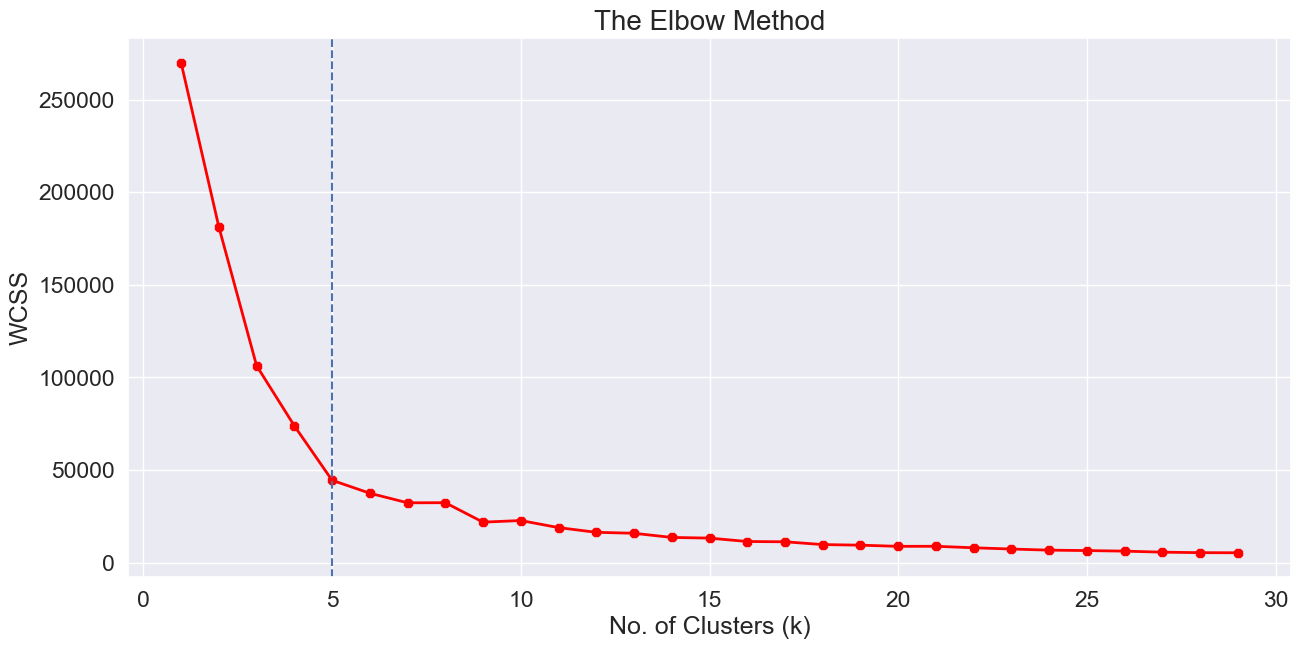

In [161]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# 6. Clustering

In [162]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

In [163]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [164]:
kms.cluster_centers_

array([[ 48.26      ,  56.48      ],
       [127.66666667,  49.66666667],
       [ 83.51428571,  18.45714286],
       [ 83.11111111,  82.41666667],
       [ 26.30434783,  20.91304348]])

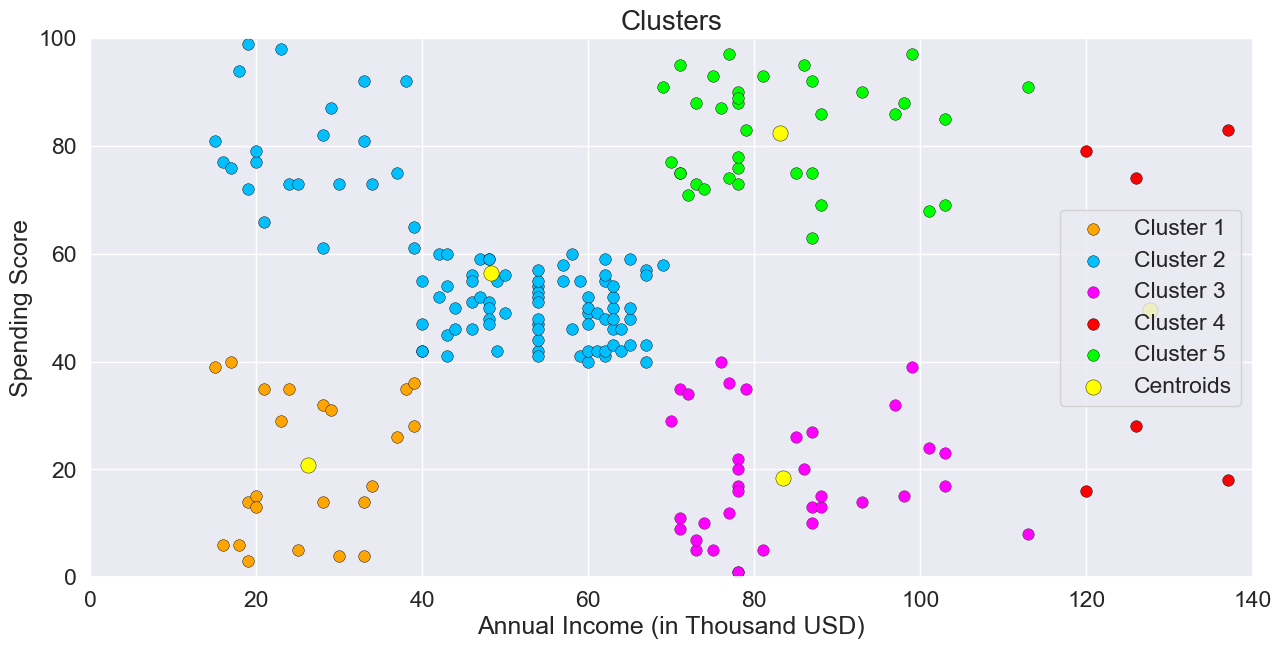

In [165]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

# 7. Analysis

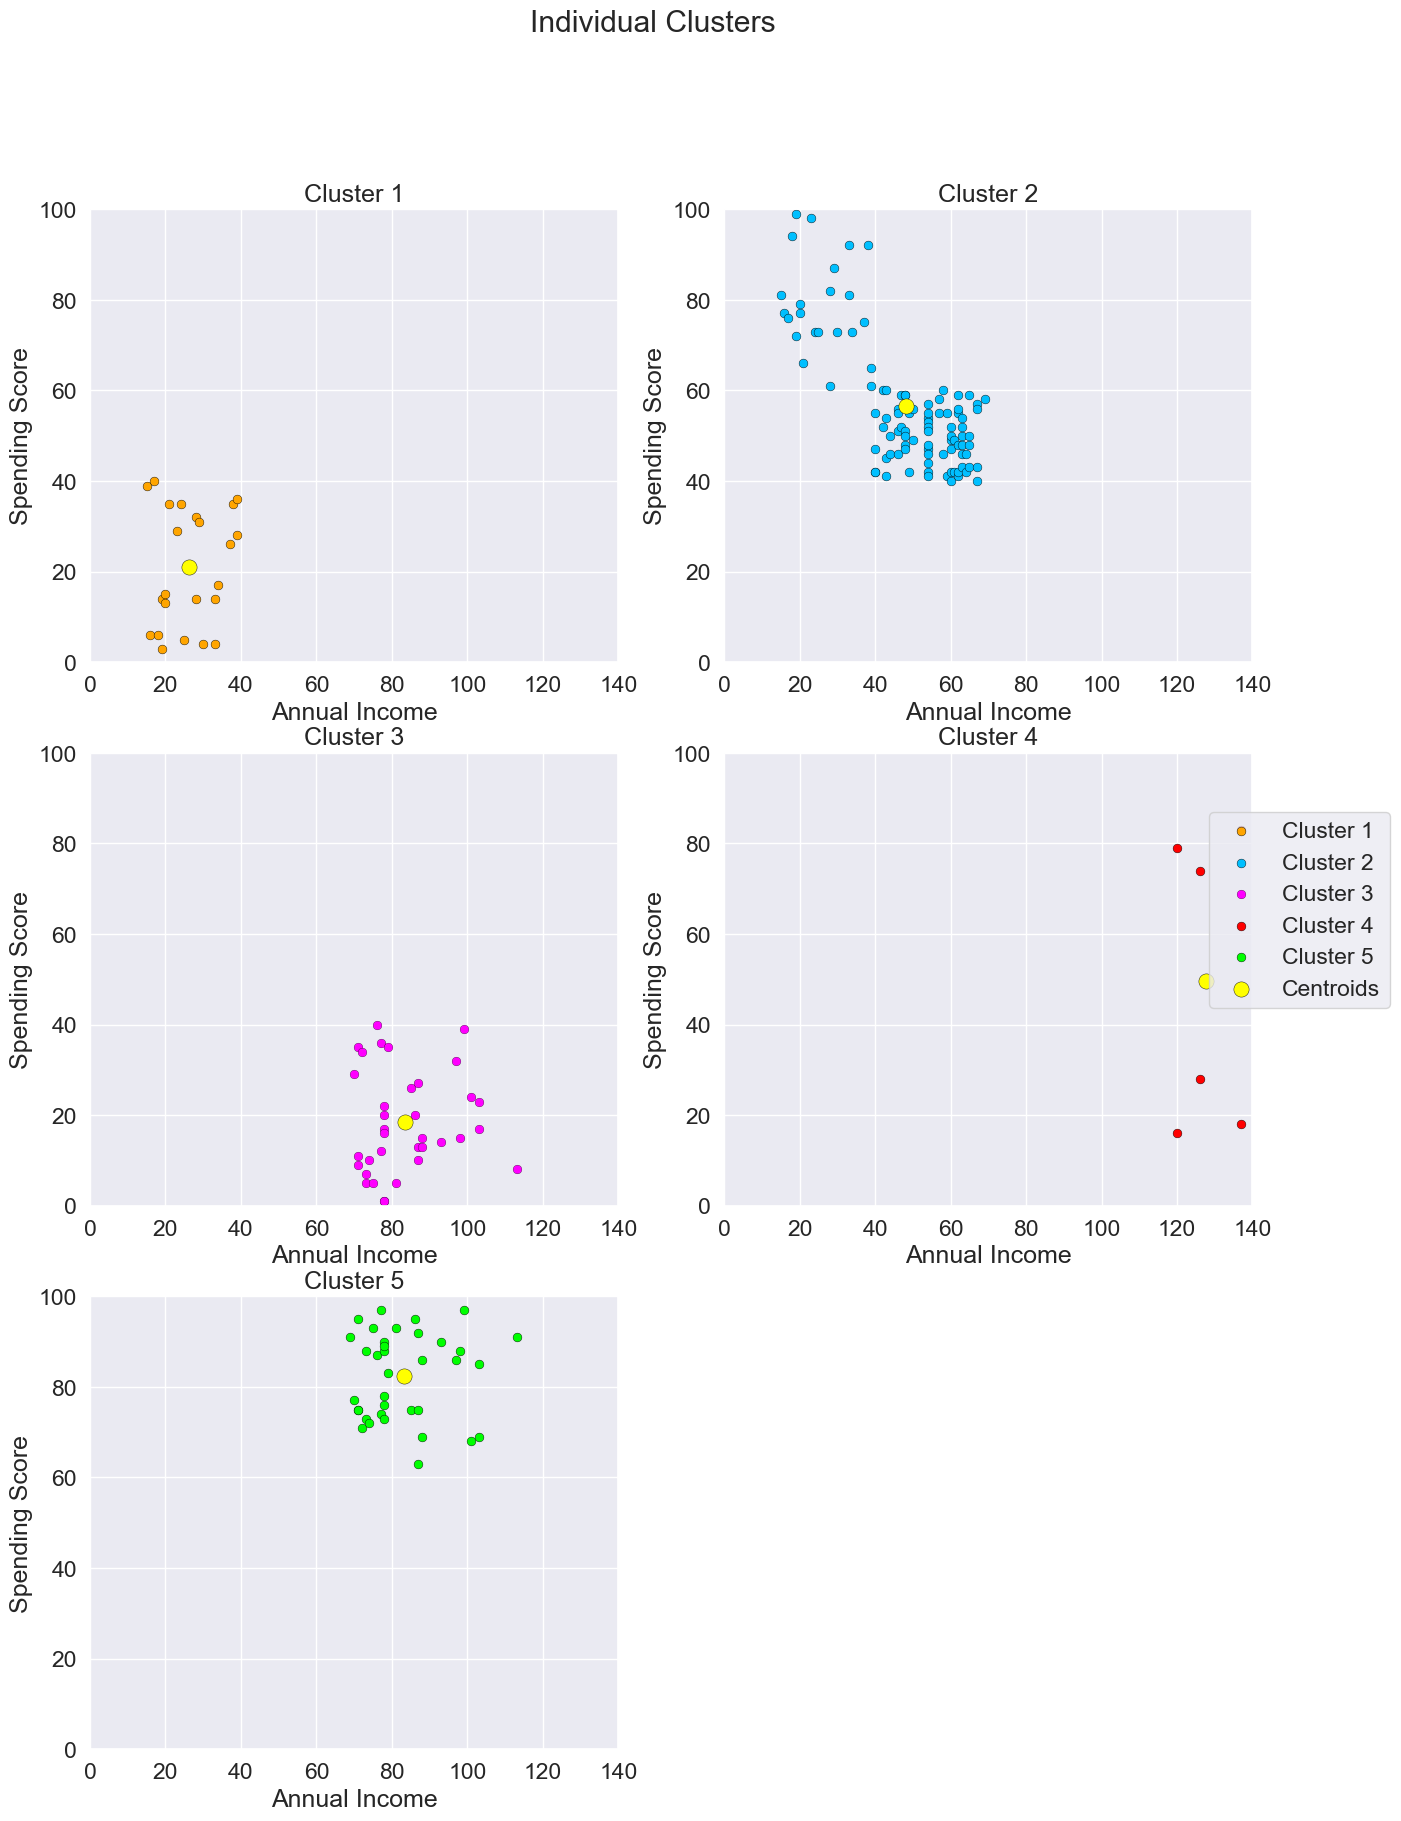

In [166]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

1. **Cluster Orange - Balanced Customers :**

    They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
    <br>
1. **Cluster Blue - Pinch Penny Customers :**

    Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.
    <br>
1. **Cluster Purple - Normal Customer :**

    Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
    <br>
1. **Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
    <br>
1. **Cluster Green - Target Customers :**

    Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.